In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('911.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [38]:
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [39]:
df['zip'].unique().size

205

In [40]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [41]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

<AxesSubplot:>

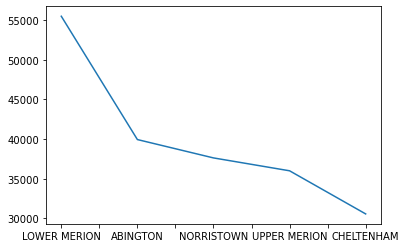

In [42]:
df['twp'].value_counts().head().plot.line()

<AxesSubplot:>

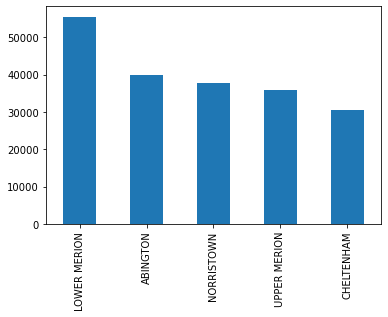

In [43]:
df['twp'].value_counts().head().plot.bar()

In [44]:
df['twp'].nunique()

68

In [45]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
Name: title, dtype: int64

<AxesSubplot:>

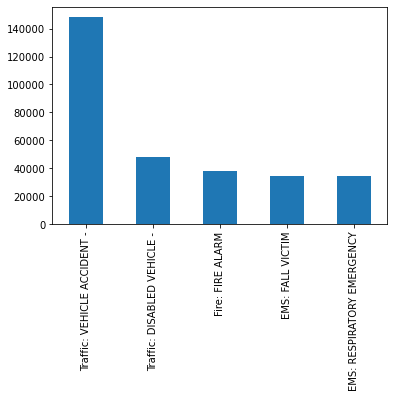

In [46]:
df['title'].value_counts().head().plot.bar()

In [47]:
df['Reason'] = df['title'].apply(lambda title: title.split()[0])

In [48]:
df['Reason']

0             EMS:
1             EMS:
2            Fire:
3             EMS:
4             EMS:
            ...   
663517    Traffic:
663518        EMS:
663519        EMS:
663520       Fire:
663521    Traffic:
Name: Reason, Length: 663522, dtype: object

In [49]:
df['Reason'].value_counts()

EMS:        332692
Traffic:    230208
Fire:       100622
Name: Reason, dtype: int64

In [54]:
df['timeStamp_dt'] = pd.to_datetime(df['timeStamp'])
df['Year'] = pd.DatetimeIndex(df['timeStamp']).year
df['Month'] = pd.DatetimeIndex(df['timeStamp']).month
df['Time'] = pd.DatetimeIndex(df['timeStamp']).time
df['dayOfWeek'] = pd.DatetimeIndex(df['timeStamp']).dayofweek
df['date'] = pd.DatetimeIndex(df['timeStamp']).date
df['DayOfWeek'] = df['dayOfWeek'].map({0:'Mon',1:'Tue',2:'Wen',3:'Thur',4:'Fri',5:'Sat',6:'Sun'})

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

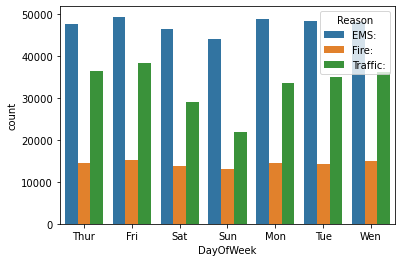

In [56]:
sns.countplot(x='DayOfWeek', data=df, hue='Reason')
#1. Max calls for what day?
#A: Friday

<AxesSubplot:xlabel='Month', ylabel='count'>

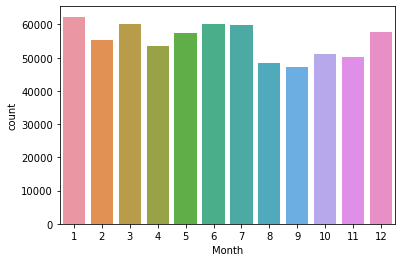

In [57]:
sns.countplot(x='Month', data=df)
#2. Max calls in which 3 months
#A: Jan Feb June


<AxesSubplot:xlabel='Year', ylabel='count'>

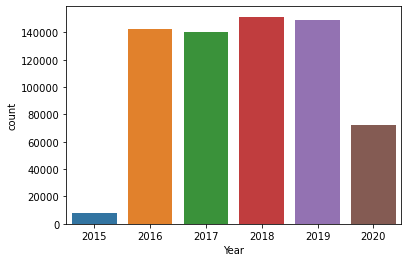

In [58]:
sns.countplot(x='Year', data=df)
#3. Max calls in which year
#A: 2018